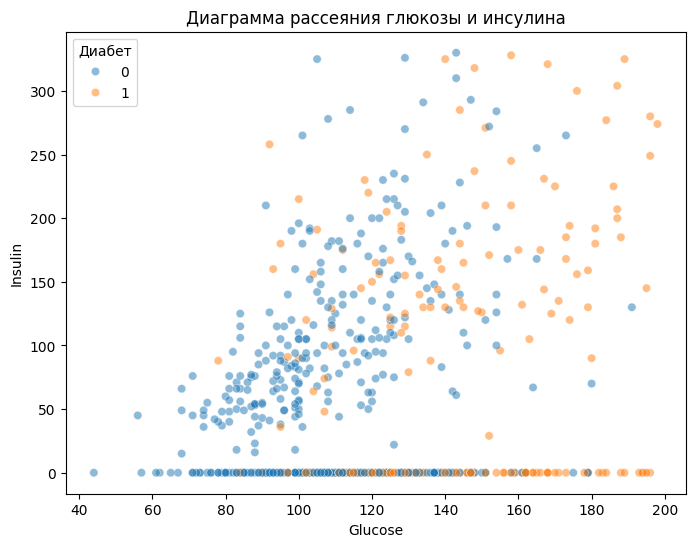

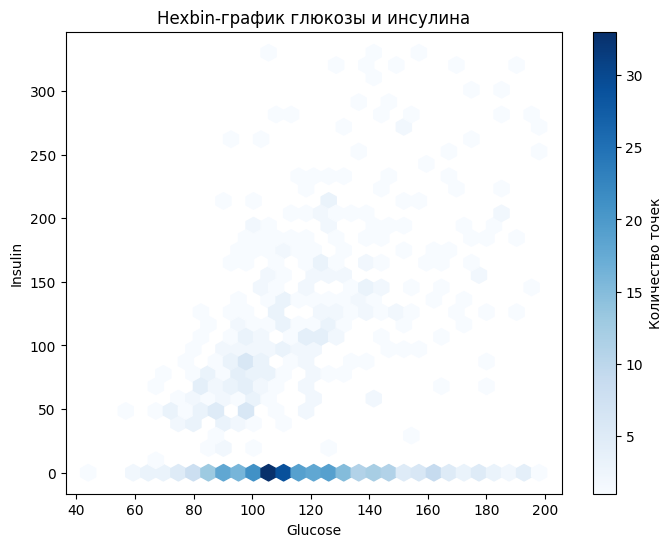

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

dataset = pd.read_csv('diabetes.csv')

dataset = dataset.drop_duplicates()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in numeric_columns:
    dataset = remove_outliers(dataset, column)

sample1 = dataset[dataset['Insulin'] == 0]
sample2 = dataset[dataset['Insulin'] != 0]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['Glucose'], y=dataset['Insulin'], hue=dataset['Outcome'], alpha=0.5)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Диаграмма рассеяния глюкозы и инсулина")
plt.legend(title="Диабет")
plt.show()

plt.figure(figsize=(8, 6))
plt.hexbin(dataset['Glucose'], dataset['Insulin'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Количество точек')
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Hexbin-график глюкозы и инсулина")
plt.show()

sns.pairplot(dataset, hue='Outcome')
plt.show()

correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции")
plt.show()

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tol = tol
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            prev_weights = self.weights.copy()

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if np.linalg.norm(self.weights - prev_weights) < self.tol:
                break
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

def prepare_data(sample):
    X = sample[['Glucose']].values
    y = sample['Outcome'].values
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train1, X_test1, y_train1, y_test1 = prepare_data(sample1)
X_train2, X_test2, y_train2, y_test2 = prepare_data(sample2)

model_custom1 = MyLogisticRegression(learning_rate=0.001, n_iter=10000)
model_custom1.fit(X_train1, y_train1)
y_pred_custom1 = model_custom1.predict(X_test1)

model_sklearn1 = LogisticRegression(solver='liblinear')
model_sklearn1.fit(X_train1, y_train1)
y_pred_sklearn1 = model_sklearn1.predict(X_test1)

model_custom2 = MyLogisticRegression(learning_rate=0.1, n_iter=100000)
model_custom2.fit(X_train2, y_train2)
y_pred_custom2 = model_custom2.predict(X_test2)

model_sklearn2 = LogisticRegression(solver='liblinear')
model_sklearn2.fit(X_train2, y_train2)
y_pred_sklearn2 = model_sklearn2.predict(X_test2)

f1_custom1 = f1_score(y_test1, y_pred_custom1)
f1_sklearn1 = f1_score(y_test1, y_pred_sklearn1)

f1_custom2 = f1_score(y_test2, y_pred_custom2)
f1_sklearn2 = f1_score(y_test2, y_pred_sklearn2)

print(f"F1-мера для собственной модели логистической регрессии на sample1: {f1_custom1:.4f}")
print(f"F1-мера для библиотеки sklearn на sample1: {f1_sklearn1:.4f}")
print(f"F1-мера для собственной модели логистической регрессии на sample2: {f1_custom2:.4f}")
print(f"F1-мера для библиотеки sklearn на sample2: {f1_sklearn2:.4f}")
